Nicholas Ciampaglio
Diabetes predictor

In this notebook I will be creating a machine learning model to predict whether or not a patient has diabetes based off of certain attributes. To do this I needed to find a dataset on kaggle and then read it into the notebook. In this first code cell I am just importing all the necessary packages I need to create the model while also reading in the data and taking a look at the first couple rows of the data.

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Here are some explanations of columns you may have never seen before:

Hypertension: also known as high blood pressure, is a chronic condition where the pressure of blood in your arteries is consistently too high

Heart Disease: a general term for a variety of conditions that affect the heart and blood vessels

BMI: body mass index, a measurement of a persons leaness based off their weight and height

HbA1c level: is a blood test that measures a person's average blood sugar levels over the past two to three months
    Normal = Below 5.7%
    Prediabetes = 5.7% to 6.4%
    Diabetes = 6.5% or higher

As we can see from the head of the data there are two columns that we need to do some cleaning with. These are the gender and smoking history columns. As for the gender column it seems we just need to set Female to 0 and Male to 1 or vice versa. For the smoking history column there are four different attributes a row could have: former, never, no info, or current. It seems that the no info could be considered a null value. First lets check if there are any current null values in our data set then we can go from there.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


It seems that are data has no null values which is perfect for us. Looking through the dataset there are some rows that have "ever" instead of "never" so we will set all of those to never. 

In [53]:
data['smoking_history'] = data['smoking_history'].replace('ever', 'never')
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Then I am going to get rid of any place in the smoking history data that says "No Info" because I am treating it as a null value. The data also seems to have a Gender attribute that is "Other", so I'm going to get rid of that as well to make things easier.

In [55]:
data.drop(data[data['smoking_history'] == 'No Info'].index, inplace=True)
data.drop(data[data['gender'] == 'Other'].index, inplace=True)
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
11,Female,54.0,0,0,former,54.70,6.0,100,0


After cleaning up the data it is time to one-hot encode the gender and smoking_history columns so we can run some tests on it.

In [57]:
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], dtype=int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          64172 non-null  float64
 1   hypertension                 64172 non-null  int64  
 2   heart_disease                64172 non-null  int64  
 3   bmi                          64172 non-null  float64
 4   HbA1c_level                  64172 non-null  float64
 5   blood_glucose_level          64172 non-null  int64  
 6   diabetes                     64172 non-null  int64  
 7   gender_Female                64172 non-null  int64  
 8   gender_Male                  64172 non-null  int64  
 9   smoking_history_current      64172 non-null  int64  
 10  smoking_history_former       64172 non-null  int64  
 11  smoking_history_never        64172 non-null  int64  
 12  smoking_history_not current  64172 non-null  int64  
dtypes: float64(3), int64(

I just wanted to make sure everything was in order before I did any training. The cell below is just checking to make sure there is an even amount of patients in the dataset with diabetes versus no diabetes.

In [59]:
data['diabetes'].value_counts()

diabetes
0    57126
1     7046
Name: count, dtype: int64

Since there are way more non-diabetic patients I will use the stratify parameter to help with this imbalance. Below I am splitting the data into X and y, where x is all the data without the target and y is just the target data. Then I am train test splitting the data with a test size of 20% and a random state of 0.

In [61]:
X = data.drop(['diabetes'], axis= 1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Below I am creating a logistic regression model because this is a binary outcome, predicting whether a patient does or does not have diabetes. I then fit the model to the training data and then score it to see how accurate the data is.

In [63]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.947331515387612

With almost 95% accuracy this model seems to be very accurate. Although, I wanted to dig a little deeper so I calculated the cross validation score which calculates how well the model will do on data it has never seen before.

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.9453500407559561

Even on data the model has never seen before the model is 94.5% accurate which is very good.

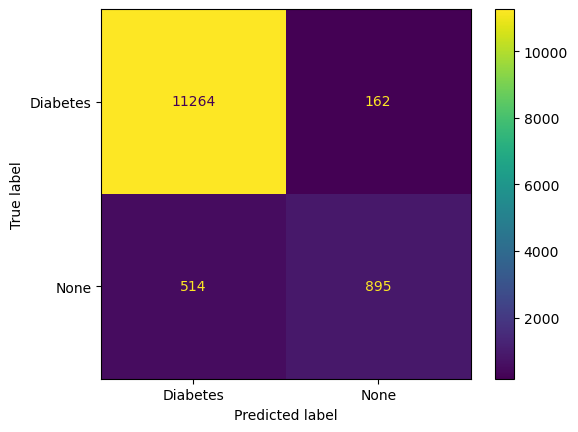

In [67]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels= ['Diabetes', 'None'])

This is the confusion matrix of the model which displays how well our model does and shows that a low percentage of the data is false positives which is very good.

I then wanted to predict how the model would do on someone I knew who is diabetic. My father was just recently diagnosed with diabetes and it is in his family so his levels arent anything crazy. The model predicted he did not have diabetes and it said he there was a 74% chance he didn't have diabetes.

In [69]:
dad = pd.DataFrame({"age":[57], "hypertension":[0], "heart_disease":[0], "bmi":[28.8], "HbA1c_level":[6.6], "blood_glucose_level":[162], "gender_Female":[0], "gender_Male":[1], "smoking_history_current":[0], "smoking_history_former":[0], "smoking_history_never":[1], "smoking_history_not current":[0]})
predicted_class = model.predict(dad)
predicted_class



array([0])

In [70]:
predicted_probabilities = model.predict_proba(dad)
predicted_probabilities

array([[0.74253898, 0.25746102]])

To figure out why the model may be predicting this way I wanted to figure out which of the attributes were affecting the model the most so I used the .coef_ function. This function showed that the HBA1C level is what the model looks at the most when predicting which makes perfect sense because my dad's HBA1C level is .1-.2 above the "safe level" with diabetic people usually being much higher than that.

In [72]:
model.coef_

array([[ 0.02444692,  1.52202902,  1.90678738,  0.05139701,  2.17995395,
         0.02720505, -6.85654891, -6.18737736, -3.42960456, -3.14542899,
        -3.45382907, -3.01506366]])

Normally with this kind of data it would be import to anonymize the data so the patients cannot be identified so I want to show what that would look like. First I'm going to look at the head of the data right now to see what it looks like and then from there I will use a Principle Component Analysis to make the data anonymous.

In [74]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0,0
5,20.0,0,0,27.32,6.6,85,0,1,0,0,0,1,0


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca_anon = PCA(n_components=13,random_state=0)
pca_data = pca_anon.fit_transform(data)
# scale the data - makes the ranges more uniform
scaler = StandardScaler()

# output data
anon_df = pd.DataFrame(scaler.fit_transform(pca_data))
pd.set_option('display.max_columns', 15)
anon_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.062062,-1.707276,-0.801122,0.806507,-0.987051,-0.768112,-0.288543,-0.030110,-0.670611,-0.075891,4.623471,49.217369,55.537396
1,0.403133,1.021439,-0.041631,0.148232,1.085480,-0.997174,0.098677,0.011718,-0.312058,-0.458477,0.017473,18.446893,-29.291592
2,0.343783,0.611156,-0.711288,-0.520221,-0.521011,1.644330,-1.704103,-0.885864,-0.194210,-0.058934,0.000564,-4.744174,-78.148959
3,0.407630,-1.433477,-1.582332,-0.815870,1.443938,0.857201,-2.077081,-1.021032,2.847490,-0.813869,4.122799,15.016630,3.428651
4,-1.333237,1.170306,0.166312,1.325314,-0.873762,-0.408241,0.232711,-0.142525,0.014345,0.055831,0.178936,-0.036965,-27.203148


After we anonymize the data it would look something like this. Say I was a researcher looking at the data I would have no idea what this data means or who it is attributed to but I would be able to tell which columns are attributing the most to the prediction the model is making.
